# Image Classification using Resnet18 PyTorch

In [1]:
import torch
import requests
from torchvision.models import ResNet18_Weights
from torchvision import transforms
from PIL import Image

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

#### Download the model

* supported files from [here](https://codeload.github.com/pytorch/vision/legacy.zip/refs/tags/v0.6.0)
* unzip the supported files it
* model weights from [here](https://download.pytorch.org/models/resnet18-f37072fd.pth)

In [3]:
model = torch.hub.load(
    source='local',
    repo_or_dir='model/pytorch-vision-b68adcf/',
    model='resnet18',
    weights=ResNet18_Weights.DEFAULT).eval().to(device)

In [4]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

#### Get the labels

In [5]:
response = requests.get("https://raw.githubusercontent.com/gradio-app/mobilenet-example/master/labels.txt")
labels = response.text.split("\n")
labels

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python',
 'Indian cobr

#### Read the image

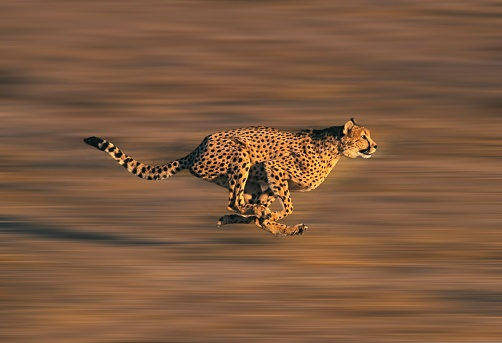

In [6]:
image = Image.open('sample/cheetah.jpeg')
image

In [7]:
image = transforms.ToTensor()(image).unsqueeze(0).to(device)
image

tensor([[[[0.5059, 0.5059, 0.5059,  ..., 0.5176, 0.5176, 0.5216],
          [0.5020, 0.4980, 0.4980,  ..., 0.4902, 0.4902, 0.4941],
          [0.4941, 0.4941, 0.4941,  ..., 0.4549, 0.4549, 0.4510],
          ...,
          [0.4549, 0.4549, 0.4588,  ..., 0.6196, 0.6157, 0.6118],
          [0.4706, 0.4706, 0.4706,  ..., 0.5490, 0.5490, 0.5490],
          [0.4824, 0.4824, 0.4784,  ..., 0.5961, 0.6000, 0.6000]],

         [[0.3608, 0.3608, 0.3608,  ..., 0.3765, 0.3765, 0.3804],
          [0.3569, 0.3529, 0.3529,  ..., 0.3569, 0.3529, 0.3608],
          [0.3569, 0.3569, 0.3569,  ..., 0.3294, 0.3294, 0.3255],
          ...,
          [0.3216, 0.3216, 0.3255,  ..., 0.4510, 0.4471, 0.4431],
          [0.3373, 0.3373, 0.3373,  ..., 0.4078, 0.4078, 0.4078],
          [0.3490, 0.3490, 0.3451,  ..., 0.4902, 0.4941, 0.4941]],

         [[0.2863, 0.2863, 0.2863,  ..., 0.2824, 0.2824, 0.2863],
          [0.2824, 0.2784, 0.2784,  ..., 0.2588, 0.2667, 0.2627],
          [0.2784, 0.2784, 0.2784,  ..., 0

#### Make prediction

In [8]:
prediction = model(image)

prediction

tensor([[-7.8000e-01, -2.6280e-01,  4.2487e-01, -2.8314e-02, -1.2239e-01,
          1.4421e+00,  1.1770e+00, -2.2919e-01, -4.1878e-02,  5.5373e-01,
         -9.8469e-02, -1.5880e+00, -5.9136e-01, -2.0916e+00, -1.4256e+00,
         -9.5024e-01, -1.0309e+00, -9.5488e-01, -5.2876e-01, -1.7147e+00,
          2.2483e+00,  1.8359e+00,  2.1059e+00,  1.4149e+00,  1.8594e+00,
         -1.7245e+00, -2.2610e-01, -1.6109e+00, -1.2559e+00, -1.3861e+00,
          1.7383e+00, -9.1860e-01,  1.3319e+00,  2.8880e+00,  4.0475e+00,
          1.8818e+00,  2.9793e+00, -9.9797e-01,  3.2410e+00,  1.7588e+00,
          2.4876e-01,  1.4861e+00,  1.7397e+00,  2.1485e+00,  1.7968e-01,
          2.5685e+00,  6.0383e-01,  1.8279e+00,  2.3563e+00,  5.9338e+00,
          4.3755e+00,  2.1614e-01, -9.3608e-01, -3.0454e-01,  2.7565e+00,
         -1.3492e+00,  1.4294e+00, -7.1039e-01,  4.4517e+00,  2.4344e-01,
          1.3548e+00,  6.3133e-01,  1.1357e+00,  1.5427e+00,  4.4269e-01,
          2.3821e+00,  2.6026e+00,  4.

#### Get the output

In [9]:
prediction = torch.nn.functional.softmax(prediction[0], dim=0)
prediction

tensor([8.2331e-05, 1.3810e-04, 2.7468e-04, 1.7459e-04, 1.5891e-04, 7.5966e-04,
        5.8276e-04, 1.4282e-04, 1.7224e-04, 3.1246e-04, 1.6276e-04, 3.6701e-05,
        9.9424e-05, 2.2180e-05, 4.3168e-05, 6.9444e-05, 6.4063e-05, 6.9121e-05,
        1.0585e-04, 3.2333e-05, 1.7011e-03, 1.1263e-03, 1.4754e-03, 7.3924e-04,
        1.1531e-03, 3.2017e-05, 1.4326e-04, 3.5867e-05, 5.1154e-05, 4.4909e-05,
        1.0215e-03, 7.1676e-05, 6.8035e-04, 3.2252e-03, 1.0283e-02, 1.1791e-03,
        3.5334e-03, 6.6207e-05, 4.5904e-03, 1.0427e-03, 2.3033e-04, 7.9378e-04,
        1.0229e-03, 1.5396e-03, 2.1495e-04, 2.3433e-03, 3.2851e-04, 1.1172e-03,
        1.8951e-03, 6.7813e-02, 1.4275e-02, 2.2294e-04, 7.0434e-05, 1.3245e-04,
        2.8278e-03, 4.6596e-05, 7.5006e-04, 8.8267e-05, 1.5405e-02, 2.2911e-04,
        6.9615e-04, 3.3767e-04, 5.5916e-04, 8.4007e-04, 2.7962e-04, 1.9446e-03,
        2.4244e-03, 1.2807e-02, 2.0984e-03, 1.9271e-05, 8.4901e-06, 2.4100e-05,
        2.2165e-05, 1.1490e-04, 2.0671e-

#### Generate labels

In [10]:
confidences = {labels[i]: float(prediction[i]) for i in range(1000)}
confidences

{'tench': 8.233139669755474e-05,
 'goldfish': 0.0001380960165988654,
 'great white shark': 0.00027468346524983644,
 'tiger shark': 0.00017458919319324195,
 'hammerhead': 0.0001589141902513802,
 'electric ray': 0.0007596607320010662,
 'stingray': 0.0005827565910294652,
 'cock': 0.000142816556035541,
 'hen': 0.00017223696340806782,
 'ostrich': 0.00031246169237419963,
 'brambling': 0.00016276071255560964,
 'goldfinch': 3.670067962957546e-05,
 'house finch': 9.942372707882896e-05,
 'junco': 2.2180114683578722e-05,
 'indigo bunting': 4.316815466154367e-05,
 'robin': 6.944350752746686e-05,
 'bulbul': 6.406306783901528e-05,
 'jay': 6.912143726367503e-05,
 'magpie': 0.00010584660776657984,
 'chickadee': 3.2332842238247395e-05,
 'water ouzel': 0.0017010627780109644,
 'kite': 0.001126297633163631,
 'bald eagle': 0.0014753853902220726,
 'vulture': 0.0007392403203994036,
 'great grey owl': 0.0011530885240063071,
 'European fire salamander': 3.201694926247001e-05,
 'common newt': 0.0001432586577720

#### Sort the labels

In [11]:
confidences = {k: v for k, v in sorted(confidences.items(), key=lambda item: item[1], reverse=True)}
confidences

{'cheetah': 0.14784221351146698,
 'dowitcher': 0.09733134508132935,
 'African crocodile': 0.06781277060508728,
 'redshank': 0.046998877078294754,
 'leopard': 0.042574841529130936,
 'water snake': 0.015404953621327877,
 'American alligator': 0.014275187626481056,
 'diamondback': 0.012807391583919525,
 'leatherback turtle': 0.010283194482326508,
 'radio telescope': 0.009990676306188107,
 'prairie chicken': 0.009489055722951889,
 'lakeside': 0.008420142345130444,
 'hyena': 0.00835466105490923,
 'sandbar': 0.008339772000908852,
 'dingo': 0.008338715881109238,
 'American coot': 0.008327169343829155,
 'red-backed sandpiper': 0.008273441344499588,
 'jaguar': 0.008078004233539104,
 'Arabian camel': 0.007465343456715345,
 'pirate': 0.0070207915268838406,
 'limpkin': 0.006609422154724598,
 'red-breasted merganser': 0.006444786675274372,
 'seashore': 0.006318552885204554,
 'paddle': 0.006096487864851952,
 'zebra': 0.005969656631350517,
 'pier': 0.005613007117062807,
 'coyote': 0.00515929702669382

#### Final output

In [12]:
index = 0
for k, v in confidences.items():
    print(f'{k.capitalize()} -----> {int(round(v * 100, 0))}%')
    if index == 4:
        break
    index += 1

Cheetah -----> 15%
Dowitcher -----> 10%
African crocodile -----> 7%
Redshank -----> 5%
Leopard -----> 4%
